## SVM algorithm 
### Dataset 1

In [22]:
import nbimporter
from Helper import * 
%matplotlib inline
random_seed = 42

In [23]:
X_train, X_test, y_train, y_test = import_dataset1()

number of training samples:  24129
number of test samples:  6033


In [33]:
pipe_steps = [('scaler', StandardScaler()), 
              ('svm', SVC(shrinking=True,
                          probability=False, cache_size=200, verbose=False,
                          break_ties=False, random_state=random_seed))]

params = {'svm__kernel':['linear', 'rbf', 'sigmoid'],
         'svm__C': [0.5,1,1.5]}


pipeline = Pipeline(pipe_steps)

In [35]:
%%time

classifier_cv = RandomizedSearchCV(pipeline, params, cv=StratifiedKFold(5), scoring='roc_auc', n_jobs=-1)
classifier_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%classifier_cv.best_score_, ' Best Params : ', str(classifier_cv.best_params_))

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Score : 0.88  Best Params :  {'svm__kernel': 'linear', 'svm__C': 1}
CPU times: user 1min 11s, sys: 991 ms, total: 1min 12s
Wall time: 7min 5s


In [36]:
c_range=list(np.arange(0.1, 1.5, 0.1000))
c_range = [round(i,2) for i in c_range]
c_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

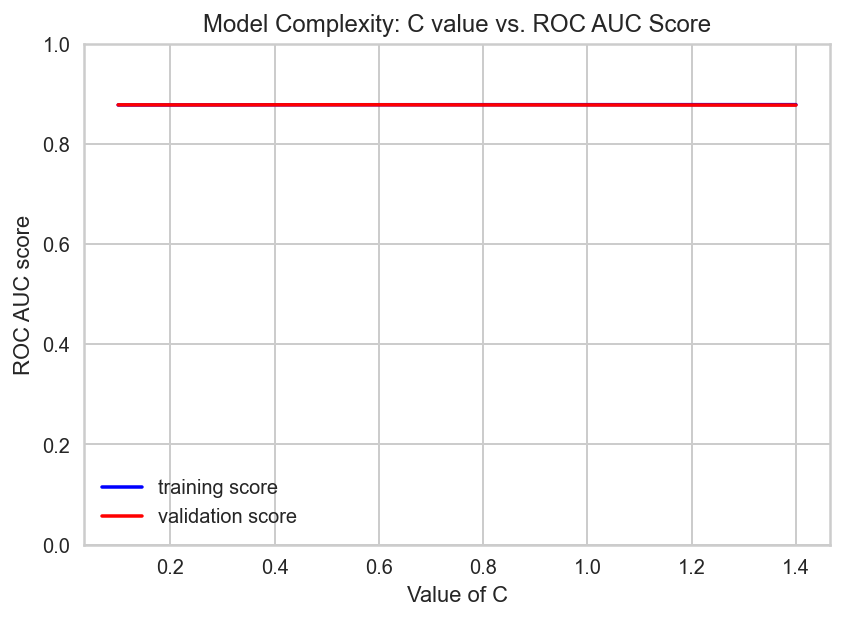

In [37]:
#c_range=list(range(0,1,0.1))
train_score, val_score = validation_curve(SVC(kernel ='linear'), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'C', 
                                          param_range = c_range,
                                          cv=StratifiedKFold(5))

plt.plot(c_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(c_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: C value vs. ROC AUC Score')
plt.ylim(0, 1)
plt.xlabel('Value of C')
plt.ylabel('ROC AUC score');

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


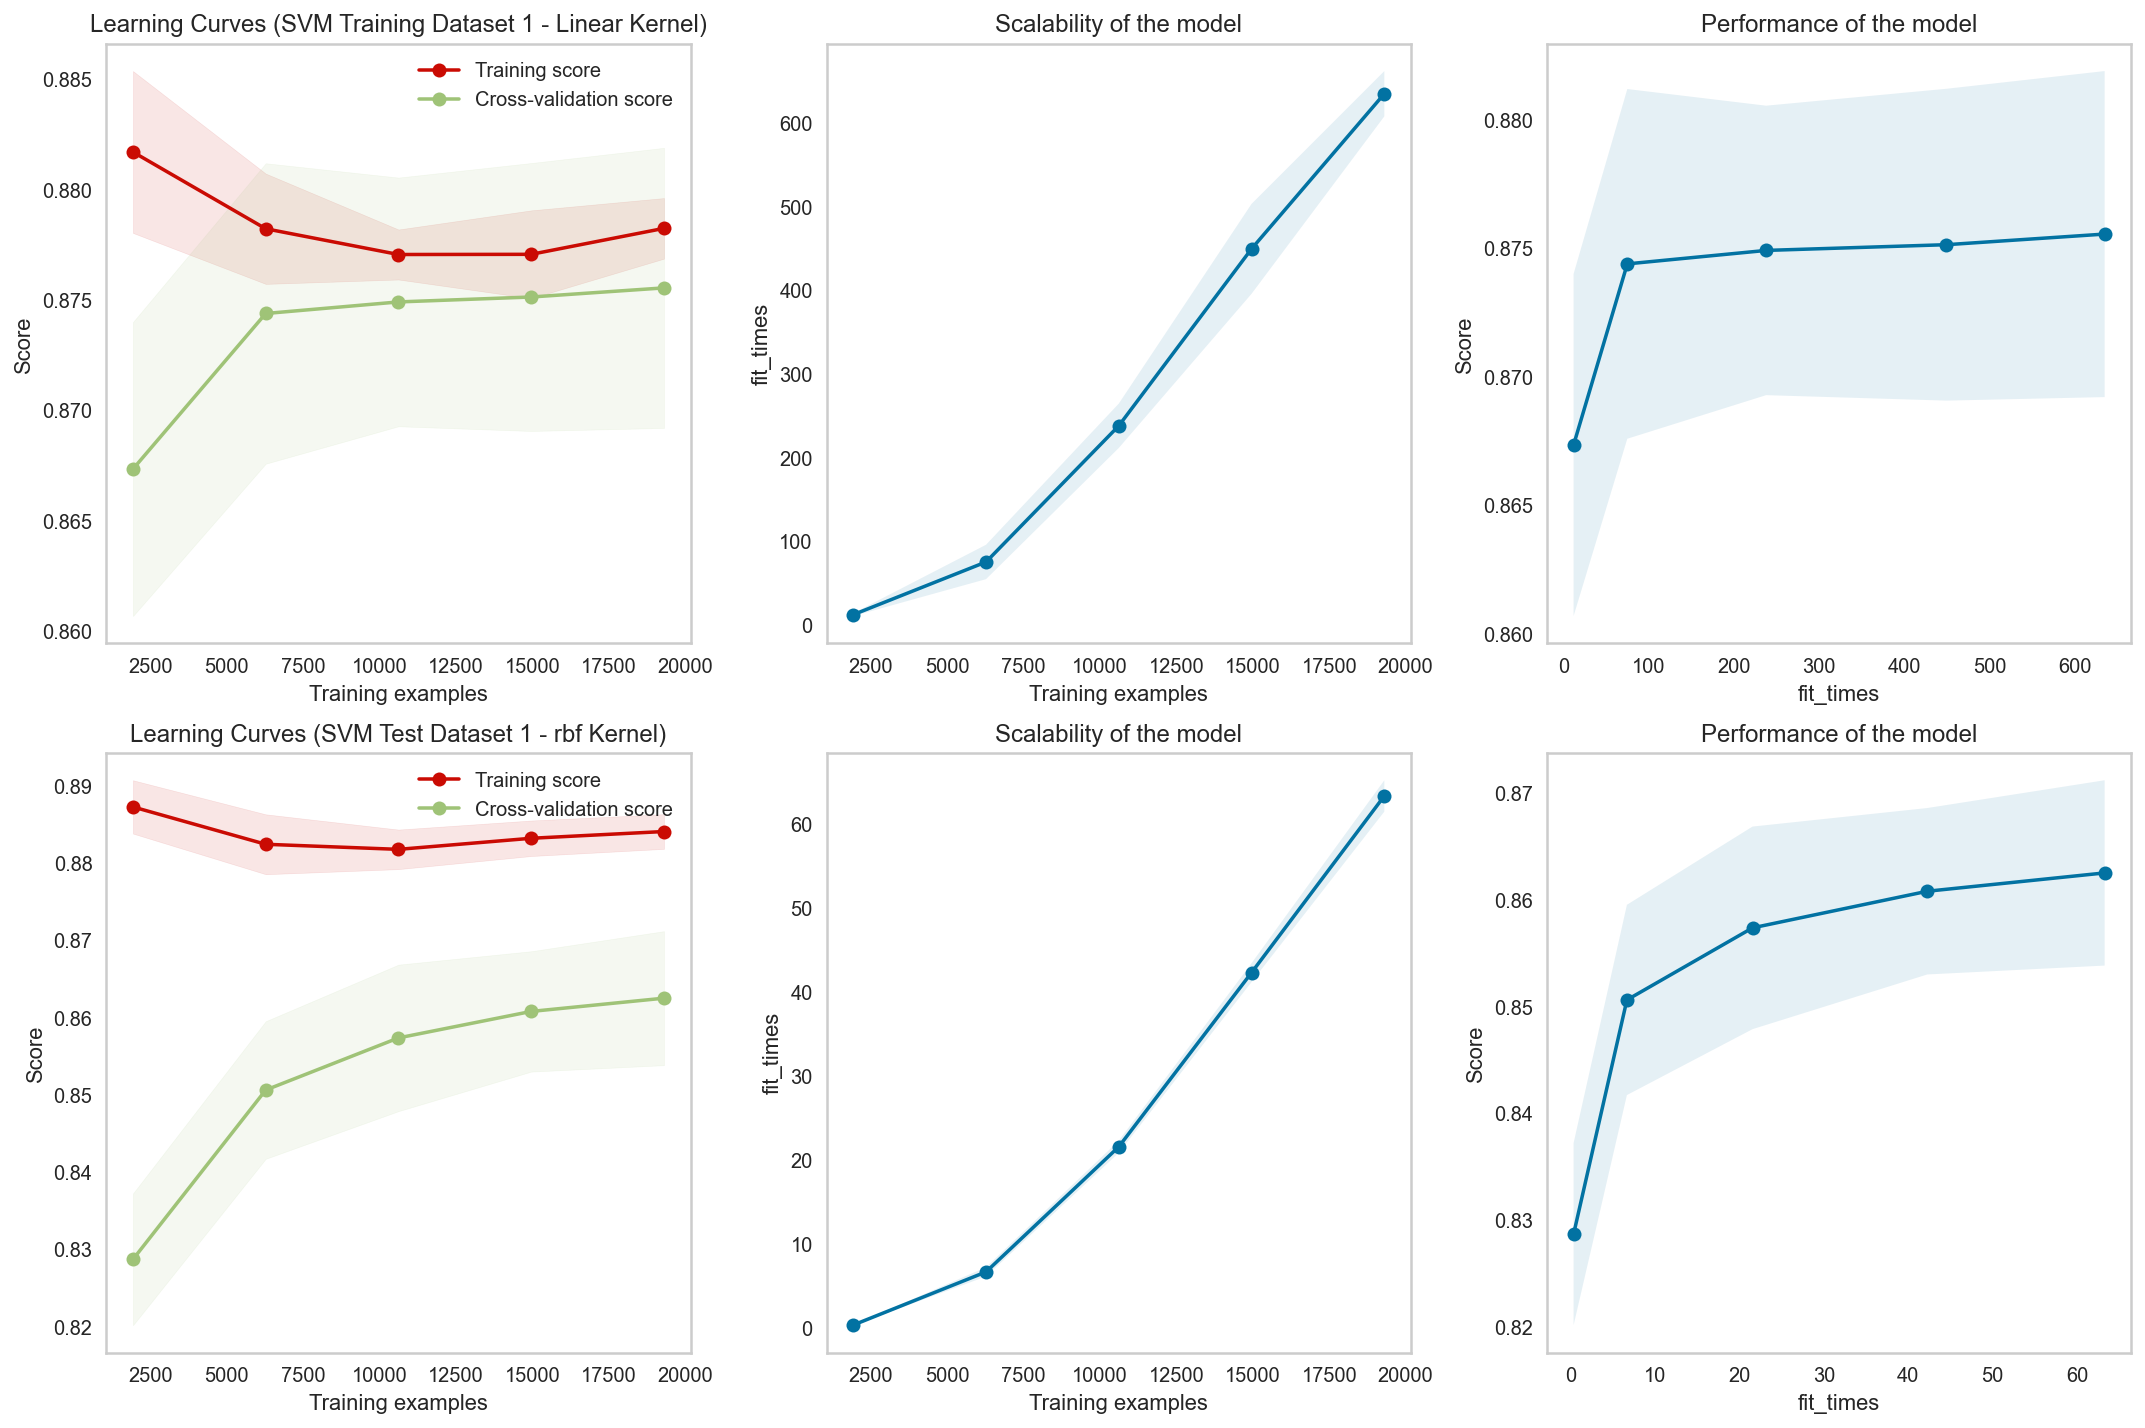

In [27]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = StratifiedKFold(5, random_state=random_seed)

estimator = SVC(random_state=0, kernel='linear', tol=0.1, gamma='auto', class_weight=None)
estimator1 = SVC(random_state=0, kernel='rbf', tol=0.1, gamma='auto', class_weight=None)

title = "Learning Curves (SVM Training Dataset 1 - Linear Kernel)"
plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
plt.tight_layout()

title = "Learning Curves (SVM Test Dataset 1 - rbf Kernel)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[1, :])

plt.tight_layout()
plt.show()

In [38]:
classifier = SVC(random_state=random_seed, kernel='linear', C=0.9, gamma='auto', class_weight=None)


In [39]:
%%time
classifier.fit(X_train, y_train)

CPU times: user 15min 22s, sys: 2.88 s, total: 15min 25s
Wall time: 15min 27s


SVC(C=0.9, gamma='auto', kernel='linear', random_state=42)

In [40]:
%%time
y_pred = classifier.predict(X_test)

CPU times: user 4.69 s, sys: 26.3 ms, total: 4.71 s
Wall time: 4.73 s


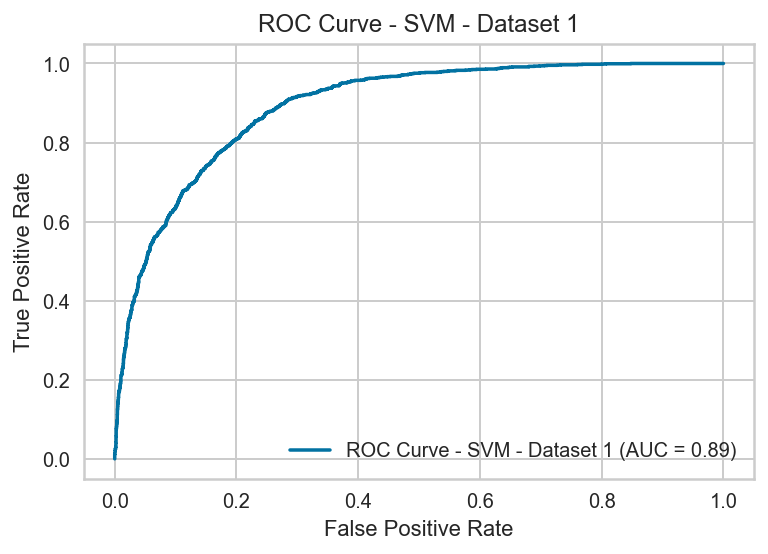

In [30]:
plot_roc_curve(classifier, X_test, y_test, name= 'ROC Curve - SVM - Dataset 1')
plt.title('ROC Curve - SVM - Dataset 1');

In [31]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.864992,0.934672,0.898483,4531.000000
1,0.739666,0.559920,0.637363,1502.000000
accuracy,0.841372,0.841372,0.841372,0.841372
macro avg,0.802329,0.747296,0.767923,6033.000000
weighted avg,0.833790,0.841372,0.833473,6033.000000
